## Multiple Disease Prediction System - 4.) Liver Disease

In [328]:
#Importing Necessary Libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [329]:
#Reading The Data Using Pandas Library (Data From A csv File Into A Pandas Dataframe)

data=pd.read_csv("/content/Liver Disease.csv")

### Dataset Link:https://www.kaggle.com/datasets/uciml/indian-liver-patient-records

In [330]:
#Check The Type Of Data

type(data)

pandas.core.frame.DataFrame

In [331]:
#Basic Information About The Data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [332]:
#Renaming The Columns

data=data.rename(columns={"Total_Bilirubin":"Total Bilirubin","Direct_Bilirubin":"Direct Bilirubin","Alkaline_Phosphotase":"Alkaline Phosphotase","Alamine_Aminotransferases":"Alamine Aminotransferase","Aspartate_Aminotransferase":"Aspartate Aminotransferase","Total_Proteins":"Total Proteins","Albumin_and_Globulin_Ratio":"Albumin and Globulin Ratio","Dataset":"Disease"})

In [333]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total Bilirubin             583 non-null    float64
 3   Direct Bilirubin            583 non-null    float64
 4   Alkaline Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin and Globulin Ratio  579 non-null    float64
 10  Disease                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [334]:
data.head()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine_Aminotransferase,Aspartate Aminotransferase,Total_Protiens,Albumin,Albumin and Globulin Ratio,Disease
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [335]:
data.tail()

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine_Aminotransferase,Aspartate Aminotransferase,Total_Protiens,Albumin,Albumin and Globulin Ratio,Disease
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [336]:
#To Get The Statistical Insight From The Dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,583.0,44.746141,16.189833,4.0,33.0,45.00,58.0,90.0
Total Bilirubin,583.0,3.298799,6.209522,0.4,0.8,1.00,2.6,75.0
Direct Bilirubin,583.0,1.486106,2.808498,0.1,0.2,0.30,1.3,19.7
Alkaline Phosphotase,583.0,290.576329,242.937989,63.0,175.5,208.00,298.0,2110.0
Alamine_Aminotransferase,583.0,80.713551,182.620356,10.0,23.0,35.00,60.5,2000.0
Aspartate Aminotransferase,583.0,109.910806,288.918529,10.0,25.0,42.00,87.0,4929.0
Total_Protiens,583.0,6.483190,1.085451,2.7,5.8,6.60,7.2,9.6
Albumin,583.0,3.141852,0.795519,0.9,2.6,3.10,3.8,5.5
Albumin and Globulin Ratio,579.0,0.947064,0.319592,0.3,0.7,0.93,1.1,2.8
Disease,583.0,1.286449,0.452490,1.0,1.0,1.00,2.0,2.0


In [337]:
#Checking Missing Values In The Dataset

data.isnull().sum()

Age                           0
Gender                        0
Total Bilirubin               0
Direct Bilirubin              0
Alkaline Phosphotase          0
Alamine_Aminotransferase      0
Aspartate Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin and Globulin Ratio    4
Disease                       0
dtype: int64

In [338]:
AGR_Skew=data["Albumin and Globulin Ratio"].skew()
print(AGR_Skew)

0.9922994479668144


In [339]:
data["Albumin and Globulin Ratio"].fillna(data["Albumin and Globulin Ratio"].median(),inplace=True)

In [340]:
data.isnull().sum()

Age                           0
Gender                        0
Total Bilirubin               0
Direct Bilirubin              0
Alkaline Phosphotase          0
Alamine_Aminotransferase      0
Aspartate Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin and Globulin Ratio    0
Disease                       0
dtype: int64

In [341]:
#To See How Many Disease States Are There In The Dataset

data["Disease"].value_counts()

1    416
2    167
Name: Disease, dtype: int64

<Axes: xlabel='Disease', ylabel='count'>

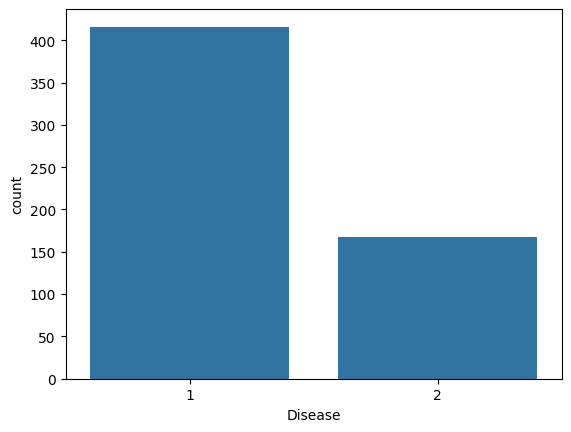

In [342]:
#Plotting The Count Plot Of Disease (Before Sampling)

sns.countplot(x="Disease",data=data)

1=Liver Disease,
2=No Liver Disease

<ipython-input-343-bdd81b9c7988>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Disease"])


<Axes: xlabel='Disease', ylabel='Density'>

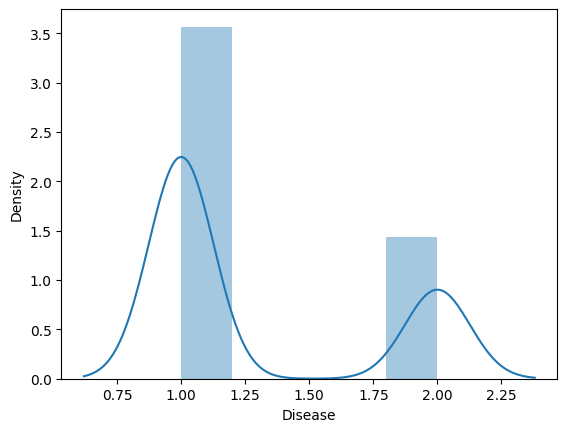

In [343]:
#Plotting The Distribution Plot Of Disease

sns.distplot(data["Disease"])

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Total Bilirubin'}>,
        <Axes: title={'center': 'Direct Bilirubin'}>],
       [<Axes: title={'center': 'Alkaline Phosphotase'}>,
        <Axes: title={'center': 'Alamine_Aminotransferase'}>,
        <Axes: title={'center': 'Aspartate Aminotransferase'}>],
       [<Axes: title={'center': 'Total_Protiens'}>,
        <Axes: title={'center': 'Albumin'}>,
        <Axes: title={'center': 'Albumin and Globulin Ratio'}>],
       [<Axes: title={'center': 'Disease'}>, <Axes: >, <Axes: >]],
      dtype=object)

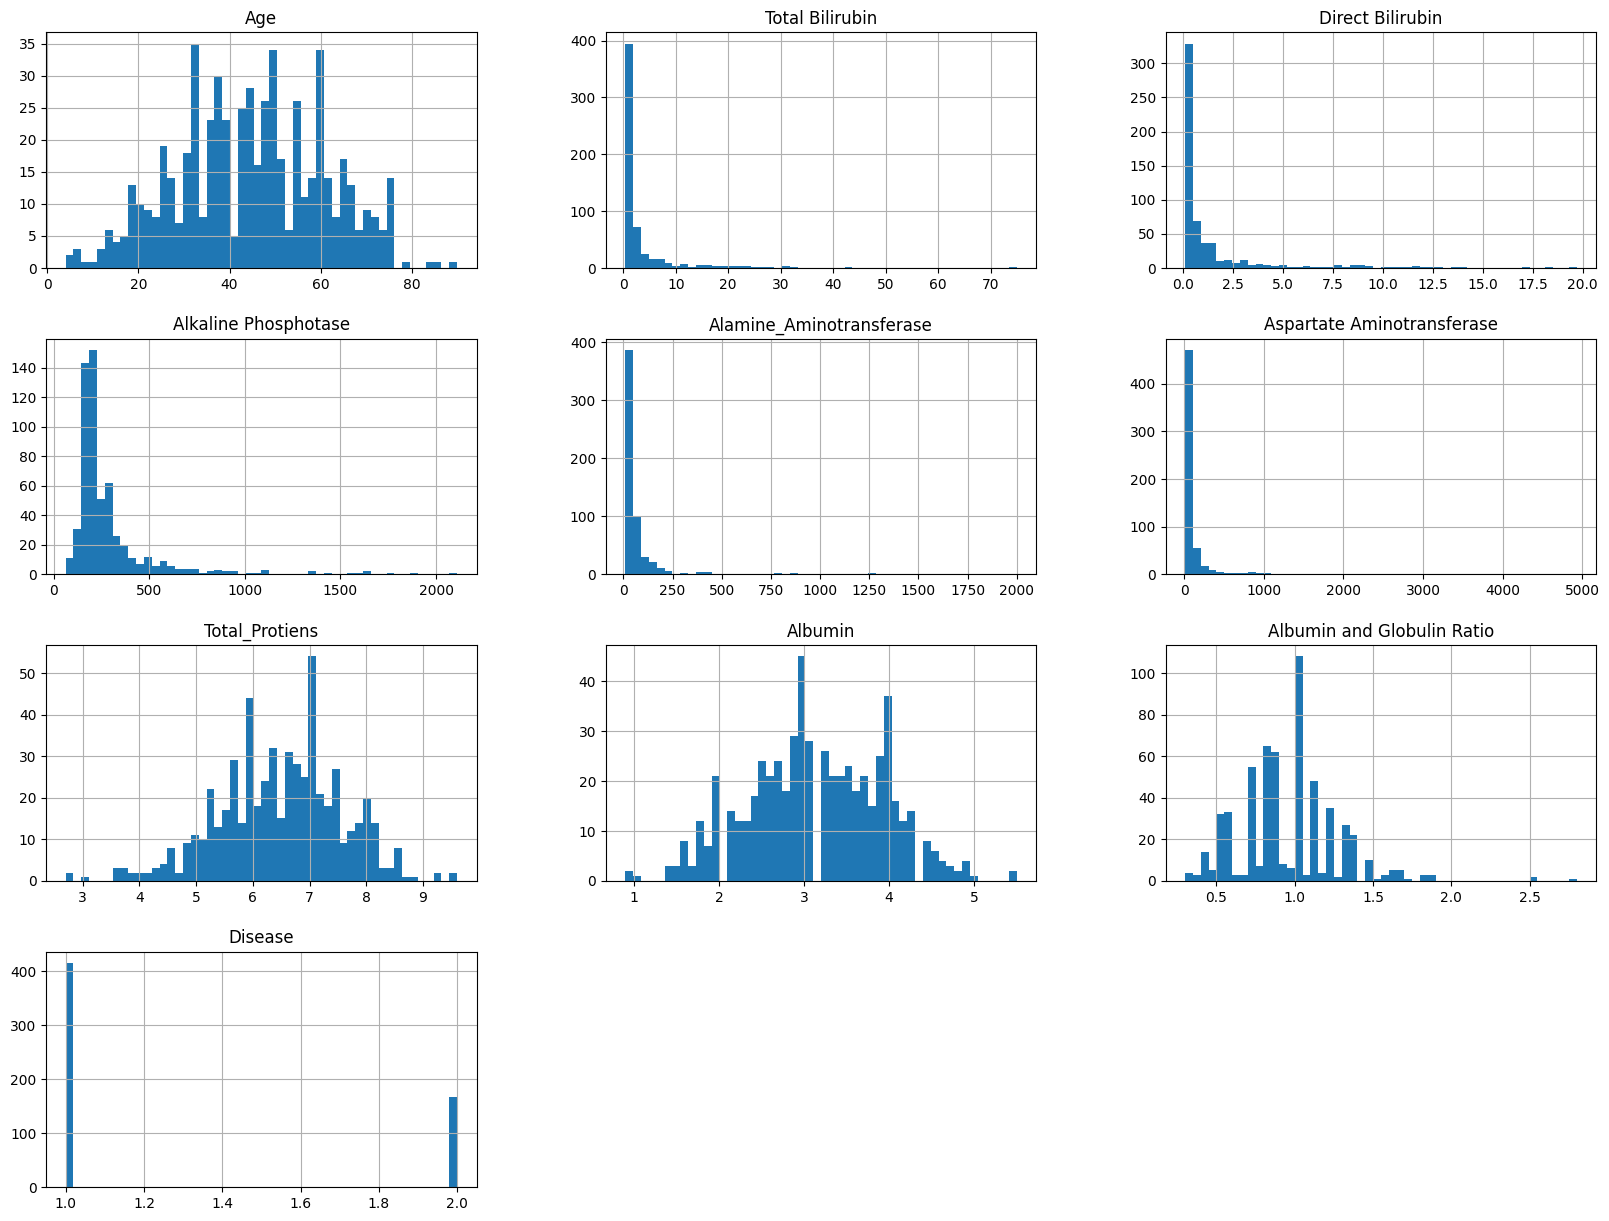

In [344]:
#Plotting The Histogram Of The Various Features

data.hist(bins=50,figsize=(20,15))

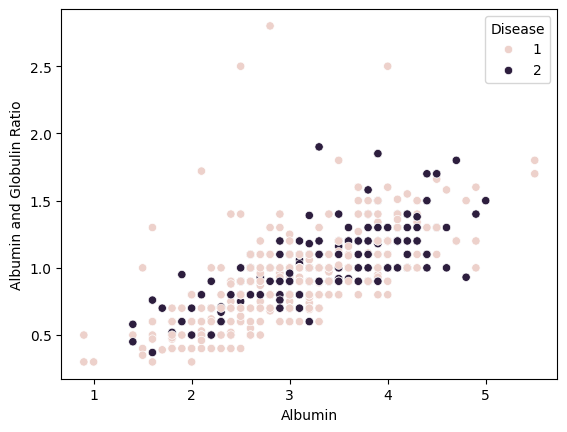

In [345]:
#Plotting The Scatterplot By Projecting Disease Based on Two Features Albumin And Albumin And Globulin Ratio

sns.scatterplot(data=data,x="Albumin",y="Albumin and Globulin Ratio",hue="Disease")
plt.show()

In [346]:
def Gender(Gender):
    if (Gender=="Male"):
        return (1)
    else:
        return (0)

In [347]:
data["Gender"]=data["Gender"].apply(Gender)

In [348]:
data["Gender"].value_counts()

1    441
0    142
Name: Gender, dtype: int64

0=Female,
1=Male

In [349]:
#To Find Correlation Among The Columns In The Dataframe

corr_matrix=data.corr()
corr_matrix

,Age,Gender,Total Bilirubin,Direct Bilirubin,Alkaline Phosphotase,Alamine_Aminotransferase,Aspartate Aminotransferase,Total_Protiens,Albumin,Albumin and Globulin Ratio,Disease
Age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.215968,-0.137351
Gender,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.089121,-0.093799,-0.003184,-0.082416
Total Bilirubin,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206015,-0.220208
Direct Bilirubin,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.199850,-0.246046
Alkaline Phosphotase,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233784,-0.184866
Alamine_Aminotransferase,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002254,-0.163416
Aspartate Aminotransferase,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.069930,-0.151934
Total_Protiens,-0.187461,-0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233828,0.035008
Albumin,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686091,0.161388
Albumin and Globulin Ratio,-0.215968,-0.003184,-0.206015,-0.199850,-0.233784,-0.002254,-0.069930,0.233828,0.686091,1.000000,0.162144


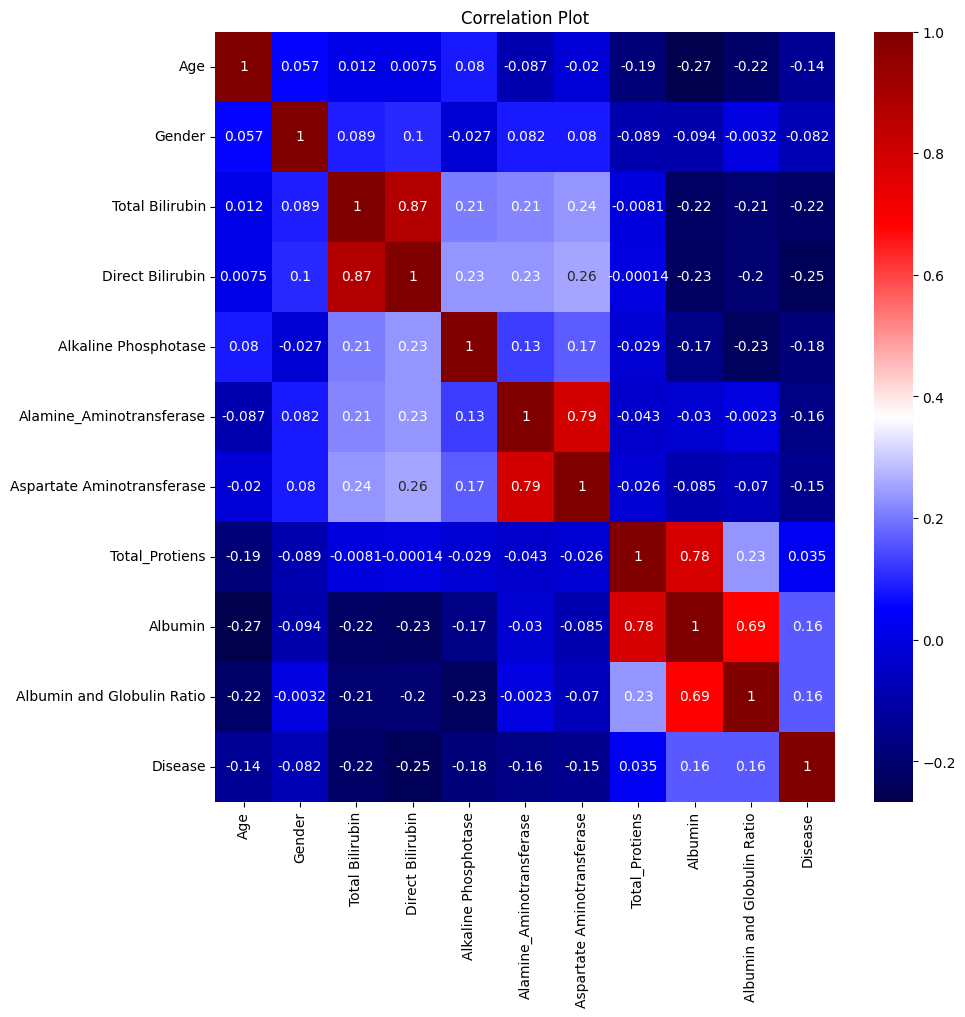

In [350]:
#Plotting The Heatmap

plt.figure(figsize=(10,10))
plt.title("Correlation Plot")
sns.heatmap(data.corr(),annot=True,cmap="seismic")
plt.show()

In [351]:
#Finding The Variables Which Has The Highest Correlation With The Target Variable (Disease)

corr_matrix["Disease"].sort_values(ascending=False)

Disease                       1.000000
Albumin and Globulin Ratio    0.162144
Albumin                       0.161388
Total_Protiens                0.035008
Gender                       -0.082416
Age                          -0.137351
Aspartate Aminotransferase   -0.151934
Alamine_Aminotransferase     -0.163416
Alkaline Phosphotase         -0.184866
Total Bilirubin              -0.220208
Direct Bilirubin             -0.246046
Name: Disease, dtype: float64

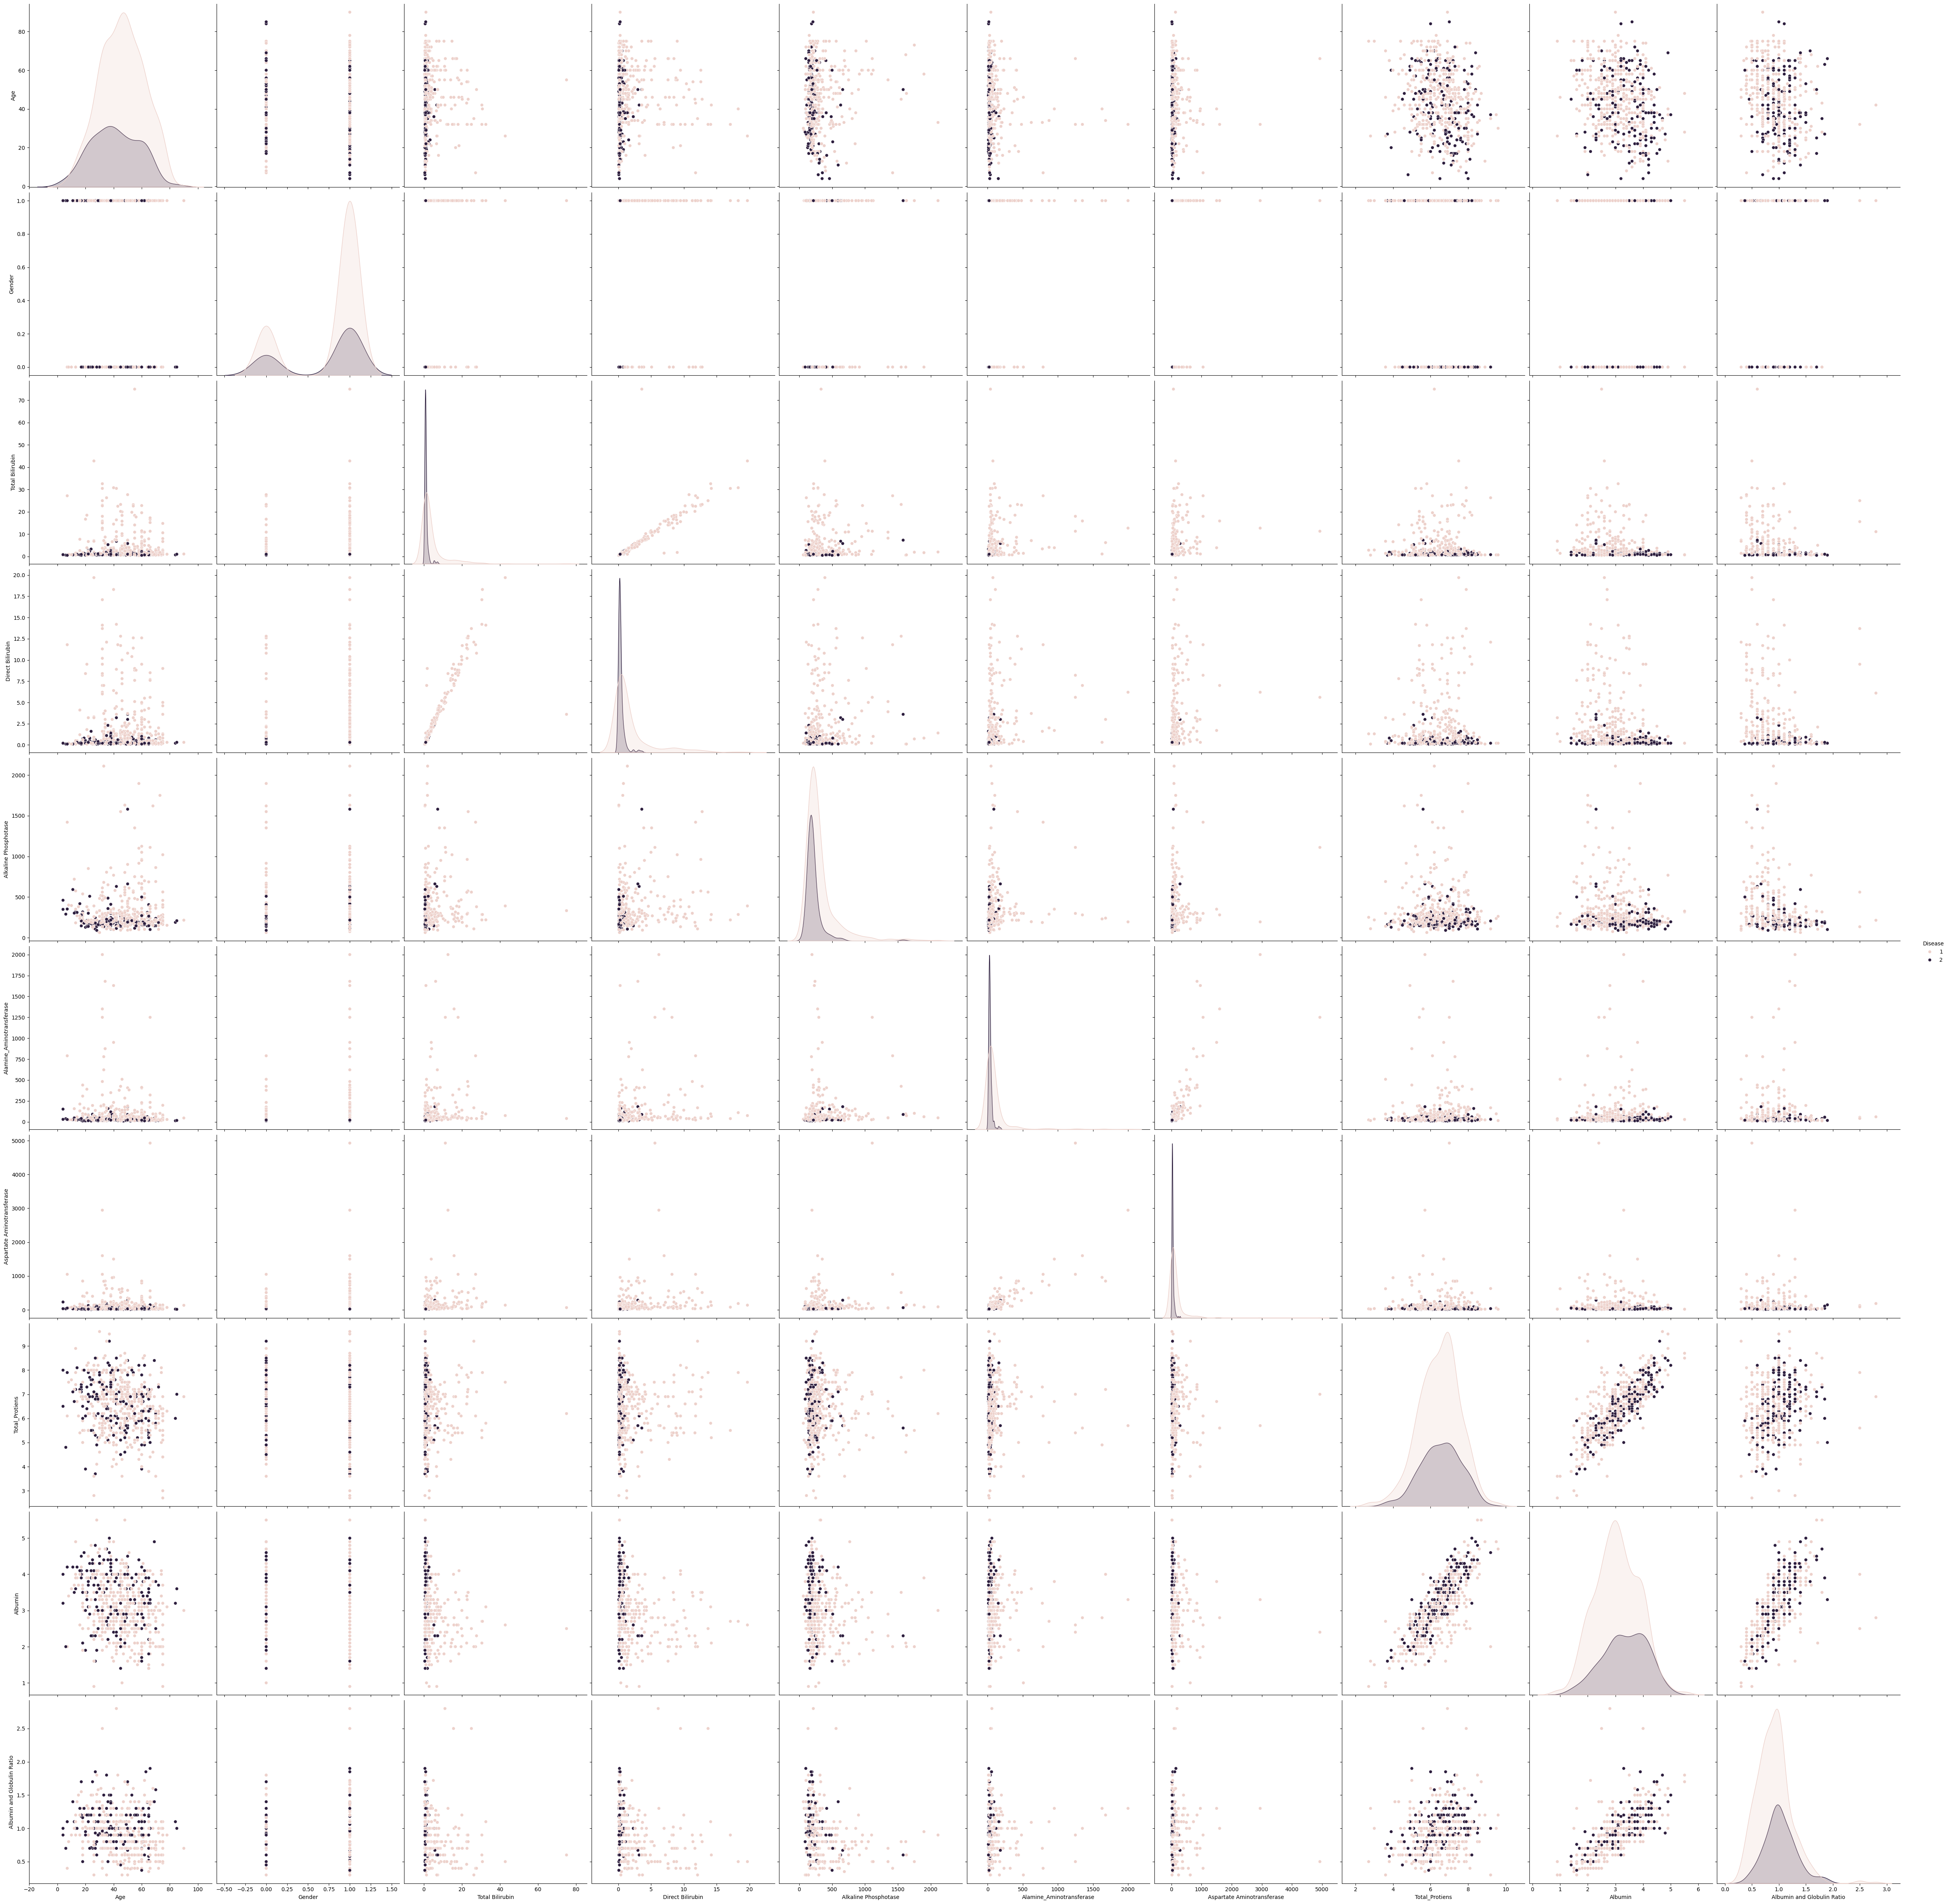

In [352]:
#Plotting The Pairplot Of Target

sns.pairplot(data=data,hue="Disease",height=5)
plt.show()

In [353]:
#Categorizing The Data

X=data.drop("Disease",axis=1)
y=data["Disease"]

In [354]:
#Perform Oversampling Using SMOTE

oversampler=SMOTE(random_state=42)
X_oversampled,y_oversampled=oversampler.fit_resample(X,y)

In [355]:
# Split The Data Into Training And Testing Sets

x_train,x_test,y_train,y_test=train_test_split(X_oversampled,y_oversampled,test_size=0.2,random_state=42)

In [356]:
#Scaling The Data

scale=StandardScaler()
x_train_scaled=scale.fit_transform(x_train)
x_test_scaled=scale.transform(x_test)

<Axes: ylabel='count'>

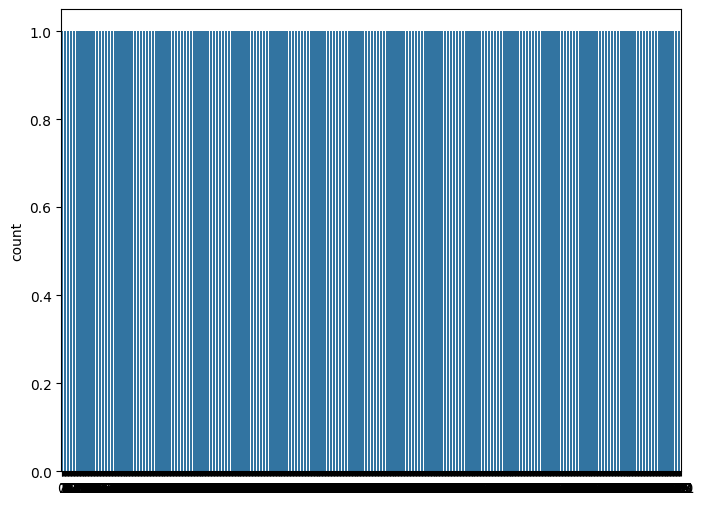

In [357]:
#Plotting The Count Plot Of Disease (After Sampling)

plt.figure(figsize=(8,6))
sns.countplot(y_oversampled)

In [358]:
#Decision Tree Classifier

In [359]:
dtc=DecisionTreeClassifier(max_depth=3)
dtc.fit(x_train_scaled,y_train)

DecisionTreeClassifier(max_depth=3)

In [360]:
y_pred1=dtc.predict(x_test_scaled)
print(y_pred1)

[2 2 1 1 1 2 2 1 1 1 1 1 1 2 1 2 2 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 1 2 1 2 2
 2 1 1 1 2 1 2 2 1 2 2 1 1 2 2 1 1 1 2 2 1 1 1 2 1 2 1 2 1 2 2 1 2 2 1 2 1
 2 2 2 1 1 2 1 1 2 2 1 2 1 2 1 1 1 2 2 1 2 2 2 2 1 1 1 1 2 2 2 1 2 2 1 2 1
 2 1 2 2 2 1 1 1 1 1 2 1 2 1 1 1 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 1 1
 2 2 2 2 2 1 2 2 1 2 1 2 2 2 1 2 2 2 1]


In [361]:
a1=accuracy_score(y_test,y_pred1)
p1=precision_score(y_test,y_pred1)
r1=recall_score(y_test,y_pred1)
f1=f1_score(y_test,y_pred1)

In [362]:
print("Accuracy   :", a1)
print("Precision  :", p1)
print("Recall     :", r1)
print("F1-Score   :", f1)

Accuracy   : 0.7245508982035929
Precision  : 0.704225352112676
Recall     : 0.6666666666666666
F1-Score   : 0.6849315068493151


In [363]:
#K-Nearest Neigbour Classifier

In [364]:
knnc=KNeighborsClassifier(n_neighbors=8)
knnc.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=8)

In [365]:
y_pred2 = knnc.predict(x_test_scaled)
print(y_pred2)

[1 2 2 1 1 2 1 2 1 1 1 1 2 1 1 2 1 1 2 2 2 1 1 2 2 1 1 1 2 2 1 2 1 1 1 2 2
 2 2 1 2 2 1 1 2 2 1 2 1 1 2 2 1 1 1 1 2 1 2 2 2 1 1 1 2 2 2 2 1 1 2 1 1 1
 2 2 2 2 2 2 2 1 2 1 2 2 1 2 1 1 1 2 2 1 2 2 2 2 1 2 2 1 2 2 1 1 2 2 1 2 1
 1 1 2 2 2 1 2 2 1 2 1 2 2 2 1 1 2 2 1 2 2 2 2 2 1 2 1 1 2 2 2 2 2 2 1 1 2
 1 2 2 2 2 1 1 2 2 2 1 2 2 2 2 2 2 2 1]


In [366]:
a2=accuracy_score(y_test,y_pred2)
p2=precision_score(y_test,y_pred2)
r2=recall_score(y_test,y_pred2)
f2=f1_score(y_test,y_pred2)

In [367]:
print("Accuracy   :", a2)
print("Precision  :", p2)
print("Recall     :", r2)
print("F1-Score   :", f2)

Accuracy   : 0.688622754491018
Precision  : 0.6619718309859155
Recall     : 0.6266666666666667
F1-Score   : 0.6438356164383562


In [368]:
#Logistic Regression

In [369]:
logr=LogisticRegression()
logr.fit(x_train_scaled, y_train)

LogisticRegression()

In [370]:
y_pred3 = logr.predict(x_test_scaled)
print(y_pred3)

[2 2 2 1 1 2 2 2 1 1 1 1 2 2 1 2 2 1 2 2 2 1 2 2 1 1 1 1 2 2 1 1 2 1 1 2 1
 2 2 1 2 2 2 1 2 1 1 2 1 1 2 1 1 1 1 1 2 1 2 1 2 2 2 1 1 2 1 2 2 1 1 1 2 1
 2 2 2 2 2 2 2 1 2 1 2 2 1 2 1 1 1 1 2 1 2 2 2 1 1 2 2 2 2 2 2 1 2 2 1 2 1
 1 1 2 2 2 1 1 2 1 2 1 1 2 2 1 2 2 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 1 2
 2 2 2 2 2 2 2 2 1 2 1 2 2 2 1 2 1 1 1]


In [371]:
a3=accuracy_score(y_test,y_pred3)
p3=precision_score(y_test,y_pred3)
r3=recall_score(y_test,y_pred3)
f3=f1_score(y_test,y_pred3)

In [372]:
print("Accuracy   :", a3)
print("Precision  :", p3)
print("Recall     :", r3)
print("F1-Score   :", f3)

Accuracy   : 0.7425149700598802
Precision  : 0.7285714285714285
Recall     : 0.68
F1-Score   : 0.7034482758620689


In [373]:
#Naive Bayes Algorithm

In [374]:
nbc=GaussianNB()
nbc.fit(x_train_scaled, y_train)

GaussianNB()

In [375]:
y_pred4 = nbc.predict(x_test_scaled)
print(y_pred4)

[2 2 2 1 1 2 2 2 1 1 2 2 2 2 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1
 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 1 2 1 2 2 1 2 2 2 2 2 1 2 2 1 2 2 2 2 1 2 2
 2 2 2 2 2 2 2 1 2 2 2 2 1 2 1 1 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 1
 2 1 2 2 2 1 1 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2
 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1]


In [376]:
a4=accuracy_score(y_test,y_pred4)
p4=precision_score(y_test,y_pred4)
r4=recall_score(y_test,y_pred4)
f4=f1_score(y_test,y_pred4)

In [377]:
print("Accuracy   :", a4)
print("Precision  :", p4)
print("Recall     :", r4)
print("F1-Score   :", f4)

Accuracy   : 0.7305389221556886
Precision  : 0.9411764705882353
Recall     : 0.4266666666666667
F1-Score   : 0.5871559633027523


In [378]:
#Neural Network Classifier

In [379]:
nnc=MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(5,2),random_state=1)
nnc.fit(x_train_scaled,y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [380]:
y_pred5=nnc.predict(x_test_scaled)
print(y_pred5)

[2 2 1 1 1 2 1 2 1 1 2 1 2 2 1 2 1 1 2 2 2 1 2 1 1 1 2 1 2 2 1 2 2 1 1 2 1
 2 2 1 2 2 1 2 2 2 1 2 1 1 2 2 1 2 1 2 2 1 2 2 2 1 2 1 2 2 1 2 2 1 2 1 1 1
 1 2 2 2 2 2 2 1 2 1 2 2 1 2 1 1 1 2 2 1 2 2 2 2 1 1 2 1 1 2 2 1 2 2 1 2 1
 2 1 2 2 2 1 1 2 2 2 1 1 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 1 2 2 1 1 2
 1 2 2 2 2 2 2 1 2 2 1 2 2 2 1 2 2 2 1]


In [381]:
a5=accuracy_score(y_test,y_pred5)
p5=precision_score(y_test,y_pred5)
r5=recall_score(y_test,y_pred5)
f5=f1_score(y_test,y_pred5)

In [382]:
print("Accuracy   :", a5)
print("Precision  :", p5)
print("Recall     :", r5)
print("F1-Score   :", f5)

Accuracy   : 0.7365269461077845
Precision  : 0.7384615384615385
Recall     : 0.64
F1-Score   : 0.6857142857142857


In [383]:
#Random Forest

In [384]:
rfc=RandomForestClassifier()
rfc.fit(x_train_scaled,y_train)

RandomForestClassifier()

In [385]:
y_pred6=rfc.predict(x_test_scaled)
print(y_pred6)

[2 2 1 1 1 2 1 2 1 1 2 1 2 1 1 2 2 1 2 2 2 1 2 1 1 1 1 1 2 1 2 1 1 1 1 1 1
 2 1 1 2 2 1 2 2 1 2 2 1 1 2 2 1 1 1 2 2 1 2 1 2 1 2 1 2 1 2 2 1 1 2 1 1 2
 2 2 2 2 2 2 2 1 2 1 1 2 1 1 1 1 1 2 2 1 2 2 2 2 1 1 2 2 2 1 2 1 2 1 1 2 1
 1 1 2 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1 1 2 2 2 2 2 1 2 2 1 2 2 2 2 2 2 1 1 2
 2 2 2 2 2 2 2 2 1 2 1 2 2 2 1 2 1 2 1]


In [386]:
a6=accuracy_score(y_test,y_pred6)
p6=precision_score(y_test,y_pred6)
r6=recall_score(y_test,y_pred6)
f6=f1_score(y_test,y_pred6)

In [387]:
print("Accuracy   :", a6)
print("Precision  :", p6)
print("Recall     :", r6)
print("F1-Score   :", f6)

Accuracy   : 0.8083832335329342
Precision  : 0.7721518987341772
Recall     : 0.8133333333333334
F1-Score   : 0.7922077922077922


In [388]:
#Support Vector Machine

In [389]:
svm=SVC(kernel='poly',decision_function_shape='ovo')
svm.fit(x_train_scaled,y_train)

SVC(decision_function_shape='ovo', kernel='poly')

In [390]:
y_pred7=svm.predict(x_test_scaled)
print(y_pred7)

[2 2 2 1 1 2 2 2 1 1 2 2 2 2 1 2 1 1 2 2 2 1 1 2 2 1 1 1 2 2 1 2 2 1 1 1 2
 2 2 1 2 2 2 1 2 2 1 2 1 1 2 1 1 1 1 2 2 1 2 2 2 1 2 1 2 2 2 2 2 2 2 1 2 1
 2 2 2 2 2 1 2 1 2 1 2 2 1 2 1 1 1 2 2 1 2 2 2 2 2 2 2 2 2 2 2 1 2 2 1 2 1
 2 1 2 2 2 1 1 2 2 2 1 1 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 1 2
 1 2 2 2 2 2 1 2 1 2 1 2 2 2 2 2 2 2 1]


In [391]:
a7=accuracy_score(y_test,y_pred7)
p7=precision_score(y_test,y_pred7)
r7=recall_score(y_test,y_pred7)
f7=f1_score(y_test,y_pred7)

In [392]:
print("Accuracy   :", a7)
print("Precision  :", p7)
print("Recall     :", r7)
print("F1-Score   :", f7)

Accuracy   : 0.7425149700598802
Precision  : 0.7857142857142857
Recall     : 0.5866666666666667
F1-Score   : 0.6717557251908396


In [393]:
#XgBoost Classifier

In [394]:
xgc=GradientBoostingClassifier()
xgc.fit(x_train_scaled,y_train)

GradientBoostingClassifier()

In [395]:
y_pred8=xgc.predict(x_test_scaled)
print(y_pred8)

[2 2 1 1 1 2 2 1 1 1 1 1 1 1 1 2 2 1 2 2 2 2 2 1 1 1 1 1 2 1 2 1 1 2 1 1 1
 2 1 1 1 2 1 2 2 2 2 2 1 1 2 2 1 1 1 2 2 1 2 1 2 1 2 1 2 1 1 2 1 2 2 1 2 1
 2 2 2 2 2 2 2 1 2 1 2 2 1 1 1 1 1 1 2 1 2 2 1 2 1 1 2 2 2 1 1 1 2 1 1 2 1
 1 1 2 2 2 1 1 1 2 1 1 1 2 1 1 1 2 2 1 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 1 1 2
 2 2 2 2 2 2 2 2 1 2 1 2 2 2 1 2 1 2 1]


In [396]:
a8=accuracy_score(y_test,y_pred8)
p8=precision_score(y_test,y_pred8)
r8=recall_score(y_test,y_pred8)
f8=f1_score(y_test,y_pred8)

In [397]:
print("Accuracy   :", a8)
print("Precision  :", p8)
print("Recall     :", r8)
print("F1-Score   :", f8)

Accuracy   : 0.7904191616766467
Precision  : 0.75
Recall     : 0.8
F1-Score   : 0.7741935483870969


In [398]:
#Comparing Accuracy Values

K-Nearest Neighbor 0.688622754491018
Decision Tree 0.7245508982035929
Naive Bayes 0.7305389221556886
Neural Network 0.7365269461077845
Logistic Regression 0.7425149700598802
Support Vector Machine 0.7425149700598802
XgBoost 0.7904191616766467
Random Forest 0.8083832335329342


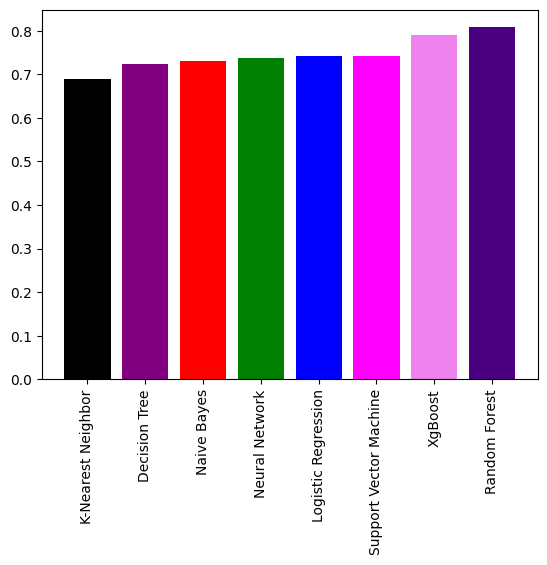

In [399]:
acc_models={"Decision Tree":a1,"K-Nearest Neighbor":a2,"Logistic Regression":a3,"Naive Bayes":a4,"Neural Network":a5,"Random Forest":a6,"Support Vector Machine":a7,"XgBoost":a8}

sorted_models=sorted(acc_models.items(),key=lambda x:x[1])

for key,value in sorted_models:
    print(key,value)

acc_models={"Decision Tree":a1,"K-Nearest Neighbor":a2,"Logistic Regression":a3,"Naive Bayes":a4,"Neural Network":a5,"Random Forest":a6,"Support Vector Machine":a7,"XgBoost":a8}

acc_keys,acc_values=zip(*sorted(zip(acc_models.keys(),acc_models.values()),key=lambda x:x[1]))

plt.bar(range(len(acc_models)),acc_values,tick_label=acc_keys,color=["black","purple","red","green","blue","magenta","violet","indigo"])
plt.xticks(rotation=90)
plt.show()

In [400]:
#Comparing Precision Values

K-Nearest Neighbor 0.6619718309859155
Decision Tree 0.704225352112676
Logistic Regression 0.7285714285714285
Neural Network 0.7384615384615385
XgBoost 0.75
Random Forest 0.7721518987341772
Support Vector Machine 0.7857142857142857
Naive Bayes 0.9411764705882353


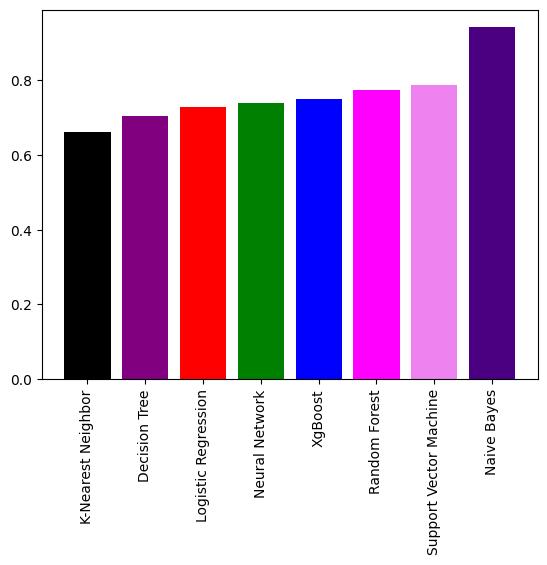

In [401]:
pre_models={"Decision Tree":p1,"K-Nearest Neighbor":p2,"Logistic Regression":p3,"Naive Bayes":p4,"Neural Network":p5,"Random Forest":p6,"Support Vector Machine":p7,"XgBoost":p8}

sorted_models=sorted(pre_models.items(),key=lambda x:x[1])

for key,value in sorted_models:
    print(key,value)

pre_models={"Decision Tree":p1,"K-Nearest Neighbor":p2,"Logistic Regression":p3,"Naive Bayes":p4,"Neural Network":p5,"Random Forest":p6,"Support Vector Machine":p7,"XgBoost":p8}

pre_keys,pre_values=zip(*sorted(zip(pre_models.keys(),pre_models.values()),key=lambda x:x[1]))

plt.bar(range(len(pre_models)),pre_values,tick_label=pre_keys,color=["black","purple","red","green","blue","magenta","violet","indigo"])
plt.xticks(rotation=90)
plt.show()

In [402]:
#Comparing Recall Values

Naive Bayes 0.4266666666666667
Support Vector Machine 0.5866666666666667
K-Nearest Neighbor 0.6266666666666667
Neural Network 0.64
Decision Tree 0.6666666666666666
Logistic Regression 0.68
XgBoost 0.8
Random Forest 0.8133333333333334


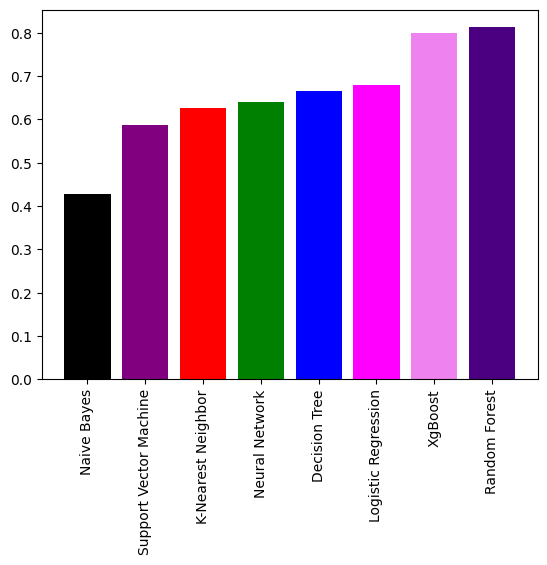

In [403]:
rec_models={"Decision Tree":r1,"K-Nearest Neighbor":r2,"Logistic Regression":r3,"Naive Bayes":r4,"Neural Network":r5,"Random Forest":r6,"Support Vector Machine":r7,"XgBoost":r8}

sorted_models=sorted(rec_models.items(),key=lambda x:x[1])

for key,value in sorted_models:
    print(key,value)

rec_models={"Decision Tree":r1,"K-Nearest Neighbor":r2,"Logistic Regression":r3,"Naive Bayes":r4,"Neural Network":r5,"Random Forest":r6,"Support Vector Machine":r7,"XgBoost":r8}

rec_keys,rec_values=zip(*sorted(zip(rec_models.keys(),rec_models.values()),key=lambda x:x[1]))

plt.bar(range(len(rec_models)),rec_values,tick_label=rec_keys,color=["black","purple","red","green","blue","magenta","violet","indigo"])
plt.xticks(rotation=90)
plt.show()

In [404]:
#Comparing F1-Score

Naive Bayes 0.5871559633027523
K-Nearest Neighbor 0.6438356164383562
Support Vector Machine 0.6717557251908396
Decision Tree 0.6849315068493151
Neural Network 0.6857142857142857
Logistic Regression 0.7034482758620689
XgBoost 0.7741935483870969
Random Forest 0.7922077922077922


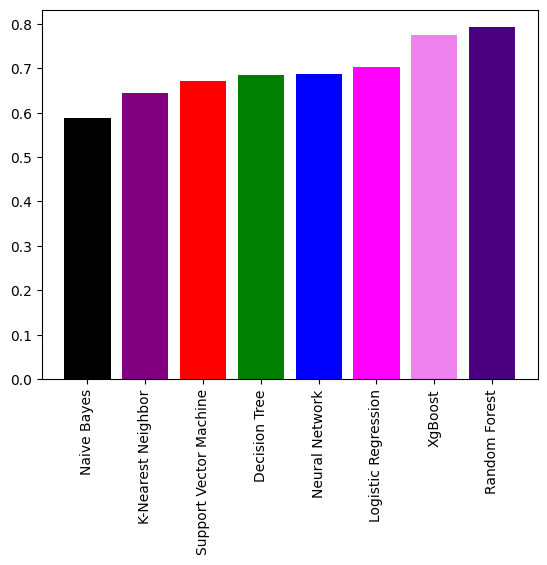

In [405]:
f1_models={"Decision Tree":f1,"K-Nearest Neighbor":f2,"Logistic Regression":f3,"Naive Bayes":f4,"Neural Network":f5,"Random Forest":f6,"Support Vector Machine":f7,"XgBoost":f8}

sorted_models=sorted(f1_models.items(),key=lambda x:x[1])

for key,value in sorted_models:
    print(key,value)

f1_models={"Decision Tree":f1,"K-Nearest Neighbor":f2,"Logistic Regression":f3,"Naive Bayes":f4,"Neural Network":f5,"Random Forest":f6,"Support Vector Machine":f7,"XgBoost":f8}

f1_keys,f1_values=zip(*sorted(zip(f1_models.keys(),f1_models.values()),key=lambda x:x[1]))

plt.bar(range(len(f1_models)),f1_values,tick_label=f1_keys,color=["black","purple","red","green","blue","magenta","violet","indigo"])
plt.xticks(rotation=90)
plt.show()

In [406]:
#Plotting All Accuracy,Precision,Recall And F1-Score Of All The Models

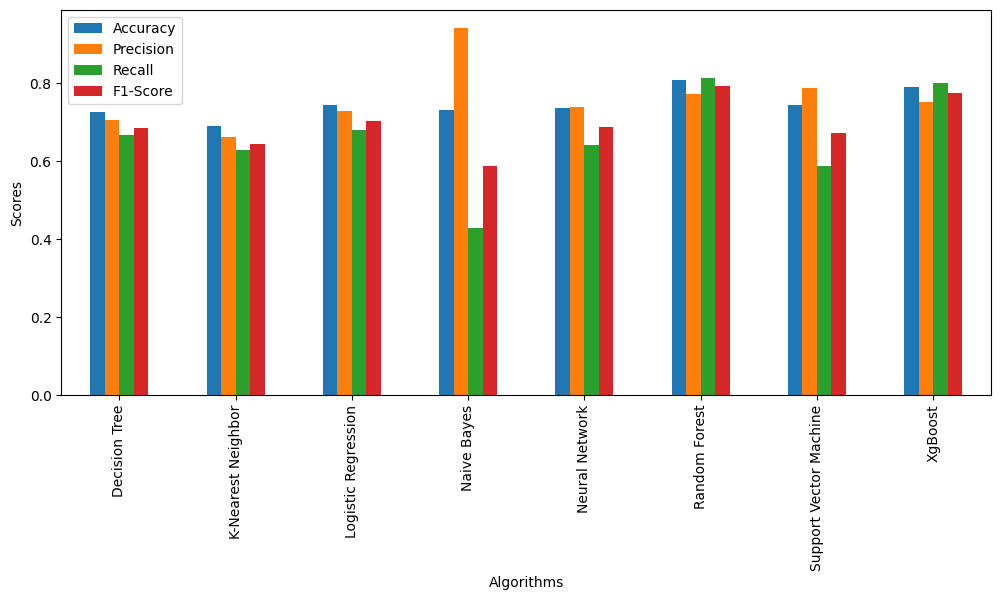

In [407]:
models_data=pd.DataFrame([["Decision Tree",a1,p1,r1,f1],["K-Nearest Neighbor",a2,p2,r2,f2],["Logistic Regression",a3,p3,r3,f3],["Naive Bayes",a4,p4,r4,f4],["Neural Network",a5,p5,r5,f5],["Random Forest",a6,p6,r6,f6],["Support Vector Machine",a7,p7,r7,f7],["XgBoost",a8,p8,r8,f8]],columns=["Scores","Accuracy","Precision","Recall","F1-Score"])
models_data.plot(x="Scores",kind="bar",stacked=False,xlabel="Algorithms",ylabel="Scores",figsize=(12,5))
plt.show()

In [408]:
#Saving The Trained Model

import pickle

filename="Liver_Disease.sav"
pickle.dump(xgc,open(filename,"wb"))

filename="Liver_Disease_Scale.sav"
pickle.dump(scale,open(filename,"wb"))

In [409]:
#Loading The Saved Model

loaded_model=pickle.load(open("Liver_Disease.sav","rb"))
loaded_model=pickle.load(open("Liver_Disease_Scale.sav","rb"))